In [39]:
import ctd
import gsw
from ctd.read import _basename
import gsw
import requests
import os
import re
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Set wd
os.chdir('/home/jovyan/ohw20-proj-ooi-profiles-section/ohw20-proj-ooi-profiles-section/')
os.getcwd()

'/home/jovyan/ohw20-proj-ooi-profiles-section/ohw20-proj-ooi-profiles-section'

In [3]:
# Provide URL to load a single file that has already been downloaded to OOI's OPENDAP server
# remember to use #fillmismatch
# Create directory that includes all urls
data_url = {}
data_url['inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
data_url['central_inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
data_url['central_offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
data_url['offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'


In [130]:
#Load in bathymetric data
bathymetry=xr.open_dataset('GMRT_39-41N_70-71W.nc')
bath_df=bathymetry.to_dataframe
bathymetry

<xarray.Dataset>
Dimensions:    (side: 2, xysize: 547305)
Dimensions without coordinates: side, xysize
Data variables:
    x_range    (side) float64 ...
    y_range    (side) float64 ...
    z_range    (side) float64 ...
    spacing    (side) float64 ...
    dimension  (side) int32 ...
    z          (xysize) float32 ...
Attributes:
    title:    Bathymetry Grid
    source:   \n\tProjection: Cylindrical Equidistant\n\tthis grid created by...

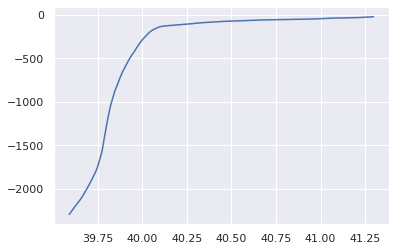

In [144]:
#Plot
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)
#plt.imshow(z)
#plt.colorbar()

# #Get x range
# x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535)
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)


# #PLot
plt.plot(y,z)

In [127]:
len(z)

1023

In [139]:
# Load the data file using xarray
def load2xarray(location):
    """
    Load data at given location and reduce to variables of interest.
    """
    ds = xr.open_dataset(data_url[location])
    ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
    print('Dataset '+ location +' has %d points' % ds.time.size)
    ds = ds[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']]
    return ds

profiles={}
for loc in list(data_url.keys()):
    profiles[loc] = load2xarray(loc)


NameError: name 'data_url' is not defined

In [ ]:
def plot_section(profiles, var, reverse=False, **kw):
    lons, lats, data = [], [], []
    for profile in profiles:
        lons.append(profile._metadata.get("lon"))
        lats.append(profiles._metadata.get("lat"))
        data.append(cast[var])


    sec = pd.concat(data, axis=1)
    sec.columns = names

    z = sec.index.values
    h = get_maxdepth(sec)

    lons, lats = map(np.atleast_2d, (lons, lats))
    x = np.append(0, np.cumsum(distance(lons, lats)[0] / 1e3))
    z = sec.index.values.astype(float)
    data = ma.masked_invalid(sec)

    if reverse:
        lons = lons[::-1]
        lats = lats[::-1]
        data = data.T[::-1].T
        h = h[::-1]

    # Contour key words.
    extend = kw.pop("extend", "both")
    fontsize = kw.pop("fontsize", 12)
    labelsize = kw.pop("labelsize", 11)
    cmap = kw.pop("cmap", None)
    levels = kw.pop(
        "levels", np.arange(np.floor(np.nanmin(data)), np.ceil(np.nanmax(data)) + 0.5, 0.5),
    )

    # Colorbar key words.
    pad = kw.pop("pad", 0.04)
    aspect = kw.pop("aspect", 40)
    shrink = kw.pop("shrink", 0.9)
    fraction = kw.pop("fraction", 0.05)

    # Topography mask key words.
    dx = kw.pop("dx", 1.0)
    kind = kw.pop("kind", "linear")
    linewidth = kw.pop("linewidth", 1.5)

    # Station symbols key words.
    station_marker = kw.pop("station_marker", None)
    color = kw.pop("color", "k")
    offset = kw.pop("offset", -5)
    alpha = kw.pop("alpha", 0.5)

    # Figure.
    figsize = kw.pop("figsize", (12, 6))
    fig, ax = plt.subplots(figsize=figsize)
    xm, hm = gen_topomask(h, lons, lats, dx=dx, kind=kind)
    ax.plot(xm, hm, color="black", linewidth=linewidth, zorder=3)
    ax.fill_between(xm, hm, y2=hm.max(), color="0.9", zorder=3)

    if station_marker:
        ax.plot(
            x,
            [offset] * len(h),
            color=color,
            marker=station_marker,
            alpha=alpha,
            zorder=5,
        )
    ax.set_xlabel("Cross-shore distance [km]", fontsize=fontsize)
    ax.set_ylabel("Depth [m]", fontsize=fontsize)
    ax.set_ylim(offset, hm.max())
    ax.invert_yaxis()

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.yaxis.set_ticks_position("left")
    ax.yaxis.set_label_position("left")
    ax.xaxis.set_tick_params(tickdir="out", labelsize=labelsize, pad=1)
    ax.yaxis.set_tick_params(tickdir="out", labelsize=labelsize, pad=1)

    cs = ax.contourf(
        x, z, data, cmap=cmap, levels=levels, alpha=1.0, extend=extend, zorder=2,
    )

    cb = fig.colorbar(
        mappable=cs,
        ax=ax,
        orientation="vertical",
        aspect=aspect,
        shrink=shrink,
        fraction=fraction,
        pad=pad,
    )
    return fig, ax, cb


fig, ax, cb = plot_section(c

In [22]:
profiles['inshore'].lat.to_dataframe

<bound method DataArray.to_dataframe of <xarray.DataArray 'lat' (time: 158237)>
[158237 values with dtype=float64]
Coordinates:
    lat       (time) float64 ...
    lon       (time) float64 ...
    pressure  (time) float64 ...
  * time      (time) datetime64[ns] 2019-10-06T15:00:03 ... 2019-10-31T21:22:...
    obs       (time) int32 0 1 2 3 4 5 ... 158232 158233 158234 158235 158236
Attributes:
    units:          degrees_north
    standard_name:  latitude
    axis:           Y
    _ChunkSizes:    511>

[]

NameError: name 'bbox' is not defined

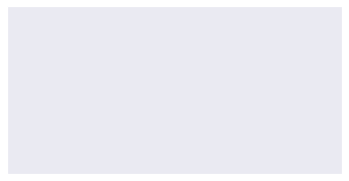

In [4]:
#Extract a single time for a single day and plot all side by side
I_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
CI_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
CO_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
O_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'

In [18]:
ids = xr.open_dataset(I_URL)
cids = xr.open_dataset(CI_URL)
cods = xr.open_dataset(CO_URL)
ods = xr.open_dataset(O_URL)

In [19]:
ids = ids.swap_dims({'obs': 'time'}) #Swap dimensions
cids = cids.swap_dims({'obs': 'time'}) #Swap dimensions
cods = cods.swap_dims({'obs': 'time'}) #Swap dimensions
ods = ods.swap_dims({'obs': 'time'}) #Swap dimensions
ids

<xarray.Dataset>
Dimensions:                                          (time: 158237)
Coordinates:
    obs                                              (time) int32 0 1 ... 158236
    lon                                              (time) float64 ...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
Data variables:
    practical_salinity                               (time) float64 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 ...
    deployment                                       (time) int32 ...
    preferred_timestamp                              (time) object ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:    

In [71]:
# select same day for each profiler
ids15=ids.sel(time="2019-10-15T03", method="nearest")
cids15=cids.sel(time="2019-10-15T03", method="nearest")
cods15=cods.sel(time="2019-10-15T03", method="nearest")
ods15=ods.sel(time="2019-10-15T03", method="nearest")
ids15

<xarray.Dataset>
Dimensions:                                          (time: 801)
Coordinates:
    obs                                              (time) int32 51980 ... 5...
    lon                                              (time) float64 ...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
Data variables:
    practical_salinity                               (time) float64 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 b'33333333333333333...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 b'33333333333333333...
    deployment                                       (time) int32 ...
    preferred_timestamp                              (time) object ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobse

(500.0, 0.0)

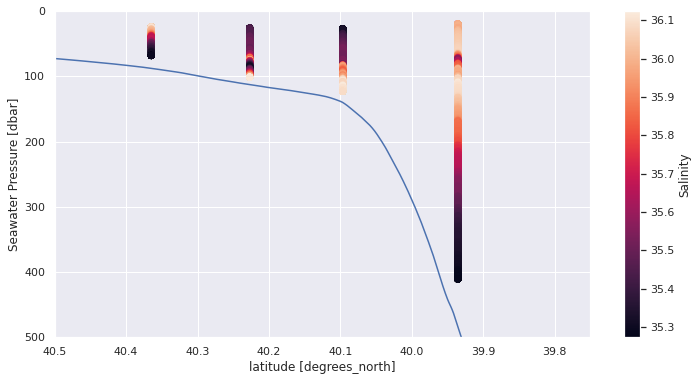

In [155]:
figsize=(12, 6)
fig, ax= plt.subplots(figsize=figsize)

cci=ids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=ids15.practical_salinity.data)


ccci=cids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=cids15.practical_salinity.data)


ccco=cods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=cods15.practical_salinity.data)

cco=ods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=ods15.practical_salinity.data)


#Add colorbar
plt.colorbar(cco,label='Salinity')
#plt.clim(34,36)

######### =======  Bathymetry
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)

# #Get lattitude range
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)


#Convert to z to p
p=gsw.p_from_z(z,y)

# #PLot bathymetry line
plt.plot(y,p)

#Flip x and y axes
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlim(40.5,39.75)
plt.ylim(500,0)


In [146]:
gsw.p_from_z?


Signature: gsw.p_from_z(z, lat, geo_strf_dyn_height=0, sea_surface_geopotential=0)
Docstring:
Calculates sea pressure from height using computationally-efficient
75-term expression for density, in terms of SA, CT and p (Roquet et al.,
2015).  Dynamic height anomaly, geo_strf_dyn_height, if provided,
must be computed with its p_ref = 0 (the surface). Also if provided,
sea_surface_geopotental is the geopotential at zero sea pressure. This
function solves Eqn.(3.32.3) of IOC et al. (2010) iteratively for p.

Parameters
----------
z : array-like
    Depth, positive up, m
lat : array-like
    Latitude, -90 to 90 degrees
geo_strf_dyn_height : array-like
    dynamic height anomaly, m^2/s^2
        Note that the reference pressure, p_ref, of geo_strf_dyn_height must
        be zero (0) dbar.
sea_surface_geopotential : array-like
    geopotential at zero sea pressure,  m^2/s^2

Returns
-------
p : array-like, dbar
    sea pressure
    ( i.e. absolute pressure - 10.1325 dbar )
File:      ~/my-co

ValueError: x and y must have same first dimension, but have shapes (1023,) and (535,)

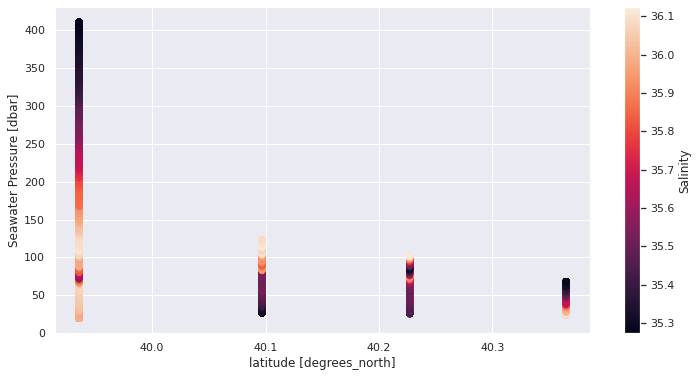

In [114]:
#Bathymetry
bathymetry=xr.open_dataset('GMRT_39-41N_70-71W.nc')
bath_df=bathymetry.to_dataframe

#Plot
z=bathymetry.z.values.reshape([535,1023]).mean(axis=1)

#Get x range
x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535)
y=np.linspace(bathymetry.y_range[0],bathymetry.y_range[1],1023)

#gsw.p_from_z()

#PLot

plt.plot(y,-z)
plt.xlim(39.8,40.5)
plt.ylim(500,0)

535

In [98]:
# xr.combine_by_coords(ids15.practical_salinity[0:100],cids15.practical_salinity[0:100],cods15.practical_salinity[0:100],ods15.practical_salinity[0:100],coords="time")
cids15

<xarray.Dataset>
Dimensions:                                          (time: 1119)
Coordinates:
    obs                                              (time) int32 61684 ... 6...
    lon                                              (time) float64 -70.88 .....
  * time                                             (time) datetime64[ns] 20...
    pressure                                         (time) float64 1.106e+04...
    lat                                              (time) float64 40.23 ......
Data variables:
    practical_salinity                               (time) float64 35.47 ......
    ctdpf_ckl_seawater_conductivity_qc_results       (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 ...
    ctdpf_ckl_seawater_pressure_qc_executed          (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_results        (time) float32 ...
    density_qc_executed                              (time) float32 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    practical_salinity_qc_results                    (time) float32 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 ...
    deployment                                       (time) int32 ...
    ctdpf_ckl_seawater_pressure_qc_results           (time) float32 ...
    preferred_timestamp                              (time) object ...
    practical_salinity_qc_executed                   (time) float32 ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
    density_qc_results                               (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_executed       (time) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:29:44.524291
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:29:44.524285
    id:                              CP02PMCI-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     1bf1f214-7913-4072-9bf3-7509e6d92541
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.

In [99]:
cods15

<xarray.Dataset>
Dimensions:                                          (time: 1252)
Coordinates:
    obs                                              (time) int32 67602 ... 6...
    lon                                              (time) float64 ...
  * time                                             (time) datetime64[ns] 20...
    pressure                                         (time) float64 ...
    lat                                              (time) float64 ...
Data variables:
    practical_salinity                               (time) float64 36.01 ......
    ctdpf_ckl_seawater_conductivity_qc_results       (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_executed   |S64 ...
    ctdpf_ckl_seawater_pressure_qc_executed          (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_results        (time) float32 ...
    density_qc_executed                              (time) float32 ...
    driver_timestamp                                 (time) datetime64[ns] ...
    id                                               (time) |S64 ...
    conductivity                                     (time) float64 ...
    practical_salinity_qc_results                    (time) float32 ...
    temperature                                      (time) float64 ...
    density                                          (time) float64 ...
    ctdpf_ckl_seawater_pressure                      (time) float64 ...
    internal_timestamp                               (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) float32 ...
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) float32 ...
    ctdpf_ckl_seawater_temperature_qartod_results    (time) float32 ...
    ctdpf_ckl_seawater_temperature                   (time) float64 ...
    ingestion_timestamp                              (time) datetime64[ns] ...
    port_timestamp                                   (time) datetime64[ns] ...
    ctdpf_ckl_seawater_conductivity_qartod_executed  |S64 ...
    deployment                                       (time) int32 ...
    ctdpf_ckl_seawater_pressure_qc_results           (time) float32 ...
    preferred_timestamp                              (time) object ...
    practical_salinity_qc_executed                   (time) float32 ...
    ctdpf_ckl_seawater_conductivity                  (time) float64 ...
    density_qc_results                               (time) float32 ...
    ctdpf_ckl_seawater_temperature_qc_executed       (time) float32 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:32:48.283996
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:32:48.283994
    id:                              CP02PMCO-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     f25e5b91-10b0-48ab-8c76-96e70aee683b
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:          

In [94]:
xr.combine_by_coords?



Signature:
xr.combine_by_coords(
    datasets,
    compat='no_conflicts',
    data_vars='all',
    coords='different',
    fill_value=<NA>,
    join='outer',
    combine_attrs='no_conflicts',
)
Docstring:
Attempt to auto-magically combine the given datasets into one by using
dimension coordinates.

This method attempts to combine a group of datasets along any number of
dimensions into a single entity by inspecting coords and metadata and using
a combination of concat and merge.

Will attempt to order the datasets such that the values in their dimension
coordinates are monotonic along all dimensions. If it cannot determine the
order in which to concatenate the datasets, it will raise a ValueError.
Non-coordinate dimensions will be ignored, as will any coordinate
dimensions which do not vary between each dataset.

Aligns coordinates, but different variables on datasets can cause it
to fail under some scenarios. In complex cases, you may need to clean up
your data and use concat/merge exp